# Differential Expression Analysis in GenePattern Notebook

Find genes that are significantly differentially expressed between classes of samples.

## Before you begin

* Sign in to GenePattern by entering your username and password into the form below. 
* Gene expression data must be in a [GCT or RES file](https://genepattern.broadinstitute.org/gp/pages/protocols/GctResFiles.html).
    * Example file: [all_aml_test.gct](https://datasets.genepattern.org/data/all_aml/all_aml_test.gct).
* The class of each sample must be identified in a [CLS file](https://genepattern.broadinstitute.org/gp/pages/protocols/ClsFiles.html).
    * Example file: [all_aml_test.cls](https://datasets.genepattern.org/data/all_aml/all_aml_test.cls).
* Learn more by reading about [file formats](http://www.broadinstitute.org/cancer/software/genepattern/file-formats-guide#GCT).


In [37]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## Step 0: Import data from GEO

In [19]:
# Requires GenePattern Notebook: pip install genepattern-notebook
import gp
import genepattern

# Username and password removed for security reasons.
genepattern.display(genepattern.session.register("https://cloud.genepattern.org/gp", "", ""))

GPAuthWidget()

In [26]:
geoimporter_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00042')
geoimporter_job_spec = geoimporter_task.make_job_spec()
geoimporter_job_spec.set_parameter("GEO.accession", "GSE51997")
geoimporter_job_spec.set_parameter("GEO.SOFT.file", "https://cloud.genepattern.org/gp/users/sc9295/tmp/run5590853667809974504.tmp/GSE51997_family.soft.gz")
geoimporter_job_spec.set_parameter("Drop.NA.Rows", "TRUE")
geoimporter_job_spec.set_parameter("data.column.name", "VALUE")
geoimporter_job_spec.set_parameter("output.filename", "<GEO.accession><GEO.SOFT.file_basename>")
geoimporter_job_spec.set_parameter("ftp.proxy.server", "")
geoimporter_job_spec.set_parameter("ftp.proxy.username", "")
geoimporter_job_spec.set_parameter("ftp.proxy.password", "")
geoimporter_job_spec.set_parameter("http.proxy.server", "")
geoimporter_job_spec.set_parameter("http.proxy.username", "")
geoimporter_job_spec.set_parameter("http.proxy.password", "")
geoimporter_job_spec.set_parameter("job.memory", "2Gb")
geoimporter_job_spec.set_parameter("job.walltime", "02:00:00")
geoimporter_job_spec.set_parameter("job.cpuCount", "1")
genepattern.display(geoimporter_task)

job479105 = gp.GPJob(genepattern.session.get(0), 479105)
genepattern.display(job479105)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00042')

GPJobWidget(job_number=479074)

## Step 1: PreprocessDataset

Preprocess gene expression data to remove platform noise and genes that have little variation. You can test this step by starting a job using parameters entered into the form below.

### Considerations

* PreprocessDataset can preprocess the data in one or more ways (in this order):
    1. Set threshold and ceiling values. Any value lower/higher than the threshold/ceiling value is reset to the threshold/ceiling value.
    2. Convert each expression value to the log base 2 of the value.
    3. Remove genes (rows) if a given number of its sample values are less than a given threshold.
    4. Remove genes (rows) that do not have a minimum fold change or expression variation.
    5. Discretize or normalize the data.
* ComparativeMarkerSelection expects non-log-transformed data. Some calculations, such as Fold Change, will produce incorrect results on log transformed data.
* If you did not generate the expression data, check whether preprocessing steps have already been taken before running the PreprocessDataset module.
* Learn more by reading about the [PreprocessDataset](https://genepattern.broadinstitute.org/gp/getTaskDoc.jsp?name=PreprocessDataset) module.

<div class="alert alert-info">
<h3 style="position: relative; top: -10px">Instructions</h3>
Click the *Run* button on the analysis below.</div>

In [28]:
preprocessdataset_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00020')
preprocessdataset_job_spec = preprocessdataset_task.make_job_spec()
preprocessdataset_job_spec.set_parameter("input.filename", "https://cloud.genepattern.org/gp/jobResults/479105/GSE51997GSE51997_family.soft.gct")
preprocessdataset_job_spec.set_parameter("threshold.and.filter", "0")
preprocessdataset_job_spec.set_parameter("floor", "20")
preprocessdataset_job_spec.set_parameter("ceiling", "20000")
preprocessdataset_job_spec.set_parameter("min.fold.change", "3")
preprocessdataset_job_spec.set_parameter("min.delta", "100")
preprocessdataset_job_spec.set_parameter("num.outliers.to.exclude", "0")
preprocessdataset_job_spec.set_parameter("row.normalization", "0")
preprocessdataset_job_spec.set_parameter("row.sampling.rate", "1")
preprocessdataset_job_spec.set_parameter("threshold.for.removing.rows", "")
preprocessdataset_job_spec.set_parameter("number.of.columns.above.threshold", "")
preprocessdataset_job_spec.set_parameter("log2.transform", "0")
preprocessdataset_job_spec.set_parameter("output.file.format", "3")
preprocessdataset_job_spec.set_parameter("output.file", "<input.filename_basename>.log2.preprocessed")
genepattern.display(preprocessdataset_task)

job479108 = gp.GPJob(genepattern.session.get(0), 479108)
genepattern.display(job479108)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00020')

GPJobWidget(job_number=479081)

## Step 1.5: Create CLS File for phenote type

In [21]:
clsfilecreator_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00261')
clsfilecreator_job_spec = clsfilecreator_task.make_job_spec()
clsfilecreator_job_spec.set_parameter("input.file", "https://cloud.genepattern.org/gp/jobResults/479105/GSE51997GSE51997_family.soft.gct")
clsfilecreator_job_spec.set_parameter("job.memory", "2Gb")
clsfilecreator_job_spec.set_parameter("job.walltime", "02:00:00")
clsfilecreator_job_spec.set_parameter("job.cpuCount", "1")
genepattern.display(clsfilecreator_task)

job479109 = gp.GPJob(genepattern.session.get(0), 479109)
genepattern.display(job479109)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00261')

GPJobWidget(job_number=478677)

## Step 2: ComparativeMarkerSelection

ComparativeMarkerSelection computes differential gene expression. For each gene, it uses a test statistic to calculate the difference in gene expression between classes and then computes a p-value to estimate the significance of the test statistic score.

Because testing tens of thousands of genes simultaneously increases the possibility of mistakenly identifying a non-marker gene as a marker gene (a false positive), ComparativeMarkerSelection corrects for multiple hypothesis testing by computing both false discovery rates (FDR) and family-wise error rates (FWER). 

### Considerations

* If the data set includes at least 10 samples per class, use the default value of 1000 permutations to ensure accurate p-values. If the data set includes fewer than 10 samples in any class, permuting the samples cannot give an accurate p-value; specify 0 permutations to use asymptotic p-values instead.
* If the data set includes more than two classes, use the phenotype test parameter to analyze each class against all others (one-versus-all) or all class pairs (all pairs).
* Learn more by reading about the [ComparativeMarkerSelection](https://genepattern.broadinstitute.org/gp/getTaskDoc.jsp?name=ComparativeMarkerSelection) module.


<div class="alert alert-info">
<h3>Instructions</h3>
<p>After the PreprocessDataset job above finishes running, send the GCT result of that job to ComparativeMarkerSelection below. To do this either drag-and-drop the link for the file above to the *input.file* input below, or click the link for the file above and select *Send to an Existing GenePattern Cell > ComparativeMarkerSelection* in the menu that appears.</p>

<p>For your convenience, the necessary CLS file for ComparativeMarkerSelection is already supplied for the analysis below. Once this is done, click *Run* for the analysis below.</p>
</div>

In [23]:
comparativemarkerselection_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00044')
comparativemarkerselection_job_spec = comparativemarkerselection_task.make_job_spec()
comparativemarkerselection_job_spec.set_parameter("input.file", "https://cloud.genepattern.org/gp/jobResults/479108/GSE51997GSE51997_family.soft.log2.preprocessed.gct")
comparativemarkerselection_job_spec.set_parameter("cls.file", "https://cloud.genepattern.org/gp/users/sc9295/tmp/run2744313410993221294.tmp/GSE51997GSE51997_family.soft.cls")
comparativemarkerselection_job_spec.set_parameter("confounding.variable.cls.file", "")
comparativemarkerselection_job_spec.set_parameter("test.direction", "2")
comparativemarkerselection_job_spec.set_parameter("test.statistic", "0")
comparativemarkerselection_job_spec.set_parameter("min.std", "")
comparativemarkerselection_job_spec.set_parameter("number.of.permutations", "10000")
comparativemarkerselection_job_spec.set_parameter("log.transformed.data", "false")
comparativemarkerselection_job_spec.set_parameter("complete", "false")
comparativemarkerselection_job_spec.set_parameter("balanced", "false")
comparativemarkerselection_job_spec.set_parameter("random.seed", "779948241")
comparativemarkerselection_job_spec.set_parameter("smooth.p.values", "true")
comparativemarkerselection_job_spec.set_parameter("phenotype.test", "one versus all")
comparativemarkerselection_job_spec.set_parameter("output.filename", "<input.file_basename>.comp.marker.odf")
genepattern.display(comparativemarkerselection_task)

job479113 = gp.GPJob(genepattern.session.get(0), 479113)
genepattern.display(job479113)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00044')

GPJobWidget(job_number=479082)

## Step 3: ComparativeMarkerSelectionViewer

Run the ComparativeMarkerSelectionViewer module to view the results. The viewer displays the test statistic score, its p value, two FDR statistics and three FWER statistics for each gene. 

### Considerations

* Generally, researchers identify marker genes based on FDR rather than the more conservative FWER.
* Often, marker genes are identified based on an FDR cutoff value of .05, which indicates that a gene identified as a marker gene has a 1 in 20 (5%) chance of being a false positive. Select Edit>Filter Features>Custom Filter to filter results based on that criteria (or any other).
* Learn more by reading about the [ComparativeMarkerSelectionViewer](https://genepattern.broadinstitute.org/gp/getTaskDoc.jsp?name=ComparativeMarkerSelectionViewer) module.

<div class="alert alert-info">
<h3>Instructions</h3>
<p>After the ComparativeMarkerSelection job above finishes, send the ODF result of that job to ComparativeMarkerSelectionViewer below. This can be achieved in a method similar to the one described in the last step.</p>
<p>Once this is accomplished, go back up to the PreprocessDataset job and also send its GCT output to ComparativeMarkerSelectionViewer.</p>

<p>Once both files are sent, click *Run* for the analysis below. Once the job downloads the necessary data it should display a visualization of the differential expression results.</p>
</div>

In [25]:
comparativemarkerselectionviewer_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00045')
comparativemarkerselectionviewer_job_spec = comparativemarkerselectionviewer_task.make_job_spec()
comparativemarkerselectionviewer_job_spec.set_parameter("comparative.marker.selection.filename", "")
comparativemarkerselectionviewer_job_spec.set_parameter("dataset.filename", "https://cloud.genepattern.org/gp/jobResults/479108/GSE51997GSE51997_family.soft.log2.preprocessed.gct")
genepattern.display(comparativemarkerselectionviewer_task)

job479121 = gp.GPJob(genepattern.session.get(0), 479121)
genepattern.display(job479121)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00045')

GPJobWidget(job_number=479083)

In [29]:
# The code below will only run if pandas is installed: http://pandas.pydata.org
from gp.data import ODF
gse51997gse51997_family_soft_log2_preprocessed_comp_marker_odf_479113 = ODF(job479113.get_file("GSE51997GSE51997_family.soft.log2.preprocessed.comp.marker.odf"))
gse51997gse51997_family_soft_log2_preprocessed_comp_marker_odf_479113

/opt/conda/envs/python3.6/lib/python3.6/site-packages/gp/data.py:208: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.dataframe = df
/opt/conda/envs/python3.6/lib/python3.6/site-packages/gp/data.py:304: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers


,Rank,Feature,Description,Score,Feature P,Feature P Low,Feature P High,FDR(BH),Q Value,Bonferroni,maxT,FWER,Fold Change,SLE Mean,SLE Std,NDs Mean,NDs Std,k
0,1,213490_s_at,AI762811,14.221592,0.0002,0.0,0.000299,0.00709,0.00599,1.0,0.0000,0.0000,3.055484,73.628529,11.627735,24.097172,7.375513,0
1,2,210649_s_at,AF231056,13.394517,0.0002,0.0,0.000299,0.00709,0.00599,1.0,0.0000,0.0000,2.310125,158.700214,22.305907,68.697673,14.540458,0
2,3,200634_at,NM_005022,13.041612,0.0002,0.0,0.000299,0.00709,0.00599,1.0,0.0000,0.0000,2.255091,3869.905714,474.213375,1716.075000,496.652766,0
3,5,227558_at,AI570531,11.733134,0.0002,0.0,0.000299,0.00709,0.00599,1.0,0.0000,0.0000,1.578954,1766.475000,165.898772,1118.763136,154.253883,0
4,6,224626_at,BE618656,11.696929,0.0002,0.0,0.000299,0.00709,0.00599,1.0,0.0000,0.0000,1.993368,144.665643,20.263602,72.573491,13.800683,0
5,7,202221_s_at,AV727101,11.358179,0.0002,0.0,0.000299,0.00709,0.00599,1.0,0.0000,0.0000,2.662006,417.178357,69.035484,156.715759,63.872816,0
6,8,202757_at,NM_015456,11.251226,0.0002,0.0,0.000299,0.00709,0.00599,1.0,0.0000,0.0000,1.735750,225.800500,27.678876,130.088136,19.701664,0
7,10,200707_at,NM_002743,10.983355,0.0002,0.0,0.000299,0.00709,0.00599,1.0,0.0000,0.0000,2.689687,57.227050,9.768224,21.276470,9.260655,0
8,12,219878_s_at,NM_015995,10.674566,0.0002,0.0,0.000299,0.00709,0.00599,1.0,0.0000,0.0000,2.087160,529.015143,90.567492,253.461727,42.076114,0
9,13,211992_at,AI445745,10.238021,0.0002,0.0,0.000299,0.00709,0.00599,1.0,0.0000,0.0000,1.652722,654.262643,87.548661,395.869818,44.373681,0


In [33]:
id_refs = {
    'ELF1': ['212420','212418'],
    'IRF1': ['202531','238725'],
    'SYNGR1': ['204287','210613','213854'],
    'UNC5A': ['236448','243833'],
    'MT1F': ['213629','217165'],
}

def get_target_gene_ranking(gene_list,df):
    finding_result = pd.DataFrame(columns=df.columns)
    for gene_name, gene_id in gene_list.items():
        target_gene = df[(df['Feature'].str.contains(gene_id[0]))|(df['Feature'].str.contains(gene_id[1]))]
        finding_result = finding_result.append(target_gene)
#         finding_result['Gene_Name'] = gene_name
    return finding_result

In [38]:
# filter gene by FDR and get new ranking
df1 = gse51997gse51997_family_soft_log2_preprocessed_comp_marker_odf_479113
df1_new = df1[(df1['FDR(BH)'] <= 0.2)]
df1_new.insert(loc=1, column="Rank_2", value=list(df1_new['Score'].abs().rank(ascending=False)))
df1_new.loc[:,'Rank_2'] = df1_new['Rank_2'].astype(int)
df1_new

/opt/conda/envs/python3.6/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Rank,Rank_2,Feature,Description,Score,Feature P,Feature P Low,Feature P High,FDR(BH),Q Value,Bonferroni,maxT,FWER,Fold Change,SLE Mean,SLE Std,NDs Mean,NDs Std,k
0,1,1,213490_s_at,AI762811,14.221592,0.0002,0.0,0.000299,0.00709,0.00599,1.0,0.0000,0.0000,3.055484,73.628529,11.627735,24.097172,7.375513,0
1,2,2,210649_s_at,AF231056,13.394517,0.0002,0.0,0.000299,0.00709,0.00599,1.0,0.0000,0.0000,2.310125,158.700214,22.305907,68.697673,14.540458,0
2,3,3,200634_at,NM_005022,13.041612,0.0002,0.0,0.000299,0.00709,0.00599,1.0,0.0000,0.0000,2.255091,3869.905714,474.213375,1716.075000,496.652766,0
3,5,5,227558_at,AI570531,11.733134,0.0002,0.0,0.000299,0.00709,0.00599,1.0,0.0000,0.0000,1.578954,1766.475000,165.898772,1118.763136,154.253883,0
4,6,6,224626_at,BE618656,11.696929,0.0002,0.0,0.000299,0.00709,0.00599,1.0,0.0000,0.0000,1.993368,144.665643,20.263602,72.573491,13.800683,0
5,7,7,202221_s_at,AV727101,11.358179,0.0002,0.0,0.000299,0.00709,0.00599,1.0,0.0000,0.0000,2.662006,417.178357,69.035484,156.715759,63.872816,0
6,8,8,202757_at,NM_015456,11.251226,0.0002,0.0,0.000299,0.00709,0.00599,1.0,0.0000,0.0000,1.735750,225.800500,27.678876,130.088136,19.701664,0
7,10,10,200707_at,NM_002743,10.983355,0.0002,0.0,0.000299,0.00709,0.00599,1.0,0.0000,0.0000,2.689687,57.227050,9.768224,21.276470,9.260655,0
8,12,12,219878_s_at,NM_015995,10.674566,0.0002,0.0,0.000299,0.00709,0.00599,1.0,0.0000,0.0000,2.087160,529.015143,90.567492,253.461727,42.076114,0
9,13,13,211992_at,AI445745,10.238021,0.0002,0.0,0.000299,0.00709,0.00599,1.0,0.0000,0.0000,1.652722,654.262643,87.548661,395.869818,44.373681,0


In [39]:
get_target_gene_ranking(id_refs,df1)

,Rank,Feature,Description,Score,Feature P,Feature P Low,Feature P High,FDR(BH),Q Value,Bonferroni,maxT,FWER,Fold Change,SLE Mean,SLE Std,NDs Mean,NDs Std,k
9125,28948,212418_at,M82882,1.008431,0.319736,0.310508,0.328784,0.616329,0.395169,1.0,1.0000,1.0000,1.040134,2071.117143,210.383229,1991.202727,261.927777,1598
23949,47934,212420_at,AL559590,-0.248449,0.824635,0.817064,0.831970,0.931567,0.597221,1.0,1.0000,1.0000,1.019387,1475.755000,320.621346,1504.365273,360.830665,5877
1019,2499,202531_at,NM_002198,3.773137,0.000600,0.000121,0.000943,0.013839,0.009281,1.0,1.0000,1.0000,1.780199,1139.032071,459.202292,639.834000,231.795246,2
16443,46239,238725_at,AW392551,0.310354,0.745051,0.736396,0.753479,0.893757,0.572994,1.0,1.0000,1.0000,1.049611,792.770000,381.570931,755.298909,303.162815,3725
16848,47146,210613_s_at,BC000731,0.275849,0.778644,0.770392,0.786665,0.910561,0.583823,1.0,1.0000,1.0000,1.111592,87.796739,97.479138,78.982851,86.765552,3893
27288,41798,204287_at,NM_004711,-0.477051,0.623675,0.614075,0.633063,0.832059,0.533428,1.0,1.0000,1.0000,1.094766,15.575421,9.068632,17.051443,9.020816,6882
4299,14611,243833_at,AI951556,1.838807,0.054789,0.050260,0.059167,0.243802,0.156381,1.0,1.0000,1.0000,1.701581,5.287149,3.700805,3.107199,3.065629,273
27910,40721,236448_at,R37358,-0.518806,0.730054,0.721241,0.738641,0.887430,0.568957,1.0,1.0000,1.0000,1.146671,1.804120,1.076243,2.068732,1.975588,6350
205,285,217165_x_at,M10943,6.425013,0.000200,0.000000,0.000299,0.007090,0.005990,1.0,0.0143,0.0143,1.983715,454.478286,110.237130,229.104682,89.292647,0
1327,3522,213629_x_at,BF246115,3.409833,0.001600,0.000786,0.002271,0.026488,0.017223,1.0,1.0000,1.0000,1.703566,290.475357,118.095702,170.510164,72.904988,7


In [40]:
get_target_gene_ranking(id_refs,df1_new)

,Rank,Rank_2,Feature,Description,Score,Feature P,Feature P Low,Feature P High,FDR(BH),Q Value,Bonferroni,maxT,FWER,Fold Change,SLE Mean,SLE Std,NDs Mean,NDs Std,k
1019,2499,2499,202531_at,NM_002198,3.773137,0.0006,0.000121,0.000943,0.013839,0.009281,1.0,1.0000,1.0000,1.780199,1139.032071,459.202292,639.834000,231.795246,2
205,285,285,217165_x_at,M10943,6.425013,0.0002,0.000000,0.000299,0.007090,0.005990,1.0,0.0143,0.0143,1.983715,454.478286,110.237130,229.104682,89.292647,0
1327,3522,3522,213629_x_at,BF246115,3.409833,0.0016,0.000786,0.002271,0.026488,0.017223,1.0,1.0000,1.0000,1.703566,290.475357,118.095702,170.510164,72.904988,7


## Extract Gene Expression Value for plotting

In [27]:
extractcomparativemarkerresults_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00046')
extractcomparativemarkerresults_job_spec = extractcomparativemarkerresults_task.make_job_spec()
extractcomparativemarkerresults_job_spec.set_parameter("comparative.marker.selection.filename", "https://cloud.genepattern.org/gp/users/sc9295/tmp/run8079990197883370849.tmp/GSE51997GSE51997_family.soft.log2.preprocessed.comp.marker.odf")
extractcomparativemarkerresults_job_spec.set_parameter("dataset.filename", "https://cloud.genepattern.org/gp/jobResults/479108/GSE51997GSE51997_family.soft.log2.preprocessed.gct")
extractcomparativemarkerresults_job_spec.set_parameter("statistic", "FDR(BH)")
extractcomparativemarkerresults_job_spec.set_parameter("min", "0")
extractcomparativemarkerresults_job_spec.set_parameter("max", "1.0")
extractcomparativemarkerresults_job_spec.set_parameter("number.of.neighbors", "")
extractcomparativemarkerresults_job_spec.set_parameter("base.output.name", "<comparative.marker.selection.filename_basename>.filt")
extractcomparativemarkerresults_job_spec.set_parameter("job.memory", "2Gb")
extractcomparativemarkerresults_job_spec.set_parameter("job.walltime", "02:00:00")
extractcomparativemarkerresults_job_spec.set_parameter("job.cpuCount", "1")
genepattern.display(extractcomparativemarkerresults_task)

job479130 = gp.GPJob(genepattern.session.get(0), 479130)
genepattern.display(job479130)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00046')

GPJobWidget(job_number=479084)

In [41]:
# The code below will only run if pandas is installed: http://pandas.pydata.org
from gp.data import GCT
gse51997gse51997_family_soft_log2_preprocessed_comp_marker_filt_gct_479130 = GCT(job479130.get_file("GSE51997GSE51997_family.soft.log2.preprocessed.comp.marker.filt.gct"))
gse51997gse51997_family_soft_log2_preprocessed_comp_marker_filt_gct_479130

/opt/conda/envs/python3.6/lib/python3.6/site-packages/gp/data.py:208: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.dataframe = df


,,GSM1256958,GSM1256959,GSM1256960,GSM1256961,GSM1256962,GSM1256963,GSM1256964,GSM1256965,GSM1256966,GSM1256967,...,GSM1256984,GSM1256985,GSM1256986,GSM1256987,GSM1256988,GSM1256989,GSM1256990,GSM1256991,GSM1256992,GSM1256993
Name,Description,,,,,,,,,,,,,,,,,,,,,
213490_s_at,AI762811,58.2732,80.0549,81.0305,62.2700,48.5920,73.6432,91.2722,67.8146,85.0982,82.5485,...,7.04719,14.6643,22.1931,27.7304,34.2850,25.5752,20.3634,21.08410,27.2162,26.2422
210649_s_at,AF231056,175.5260,207.3540,146.3800,188.1030,155.6770,163.3690,142.5860,169.0480,157.9470,159.8980,...,64.99420,65.1892,79.8981,69.9846,66.0661,66.4344,73.6086,66.66120,67.0681,62.0676
200634_at,NM_005022,4915.9800,3245.3000,3701.9500,4116.0600,2997.4400,3897.9200,4121.7700,3968.0500,3843.6000,3517.3100,...,1666.78000,1548.2200,1532.8000,1492.9900,2277.9600,2517.8300,2786.6500,2526.39000,2161.9800,2474.1000
227558_at,AI570531,1943.1600,1698.9100,1824.1300,1881.6100,1447.3800,1595.4000,1715.1400,1635.5300,1747.4900,1678.0100,...,913.49700,976.4200,957.8620,1132.8700,1006.0600,1026.9000,1327.8100,891.55800,1031.5900,998.8220
224626_at,BE618656,170.1690,132.6170,122.5470,184.3610,133.6810,124.9340,170.9930,136.3690,127.2800,158.2220,...,68.32290,79.0546,70.1784,63.6522,58.1738,77.3212,79.2951,86.11390,75.9313,77.8743
202221_s_at,AV727101,429.0570,419.6860,395.5930,461.8270,415.7010,384.5820,292.3580,340.0300,389.2550,487.4560,...,106.21100,285.8790,186.6410,138.6530,264.5070,175.7310,120.3330,242.17000,168.1530,74.8658
202757_at,NM_015456,264.2530,276.6170,198.2030,250.7050,215.0550,248.5520,195.2890,242.5170,218.4400,229.6080,...,158.08000,120.6750,116.0680,145.1520,135.5650,103.9560,125.8720,114.77300,105.5340,102.2100
200707_at,NM_002743,61.8122,57.8989,45.5291,57.7631,48.8377,66.6379,64.7838,61.8952,70.5950,70.9464,...,4.55217,17.1873,29.8231,24.1558,26.0301,10.1862,38.8999,7.90802,26.9645,26.3475
219878_s_at,NM_015995,593.1040,734.5200,494.7510,467.9120,502.5200,533.4190,552.4950,572.8710,402.6770,498.3320,...,317.94400,287.1680,327.5990,233.7310,238.3580,248.1290,273.7390,270.70200,210.0150,205.2090


In [42]:
GE_data = gse51997gse51997_family_soft_log2_preprocessed_comp_marker_filt_gct_479130.loc[:,'GSM1256971':]
GE_data

,,GSM1256971,GSM1256972,GSM1256973,GSM1256974,GSM1256975,GSM1256976,GSM1256977,GSM1256978,GSM1256979,GSM1256980,...,GSM1256984,GSM1256985,GSM1256986,GSM1256987,GSM1256988,GSM1256989,GSM1256990,GSM1256991,GSM1256992,GSM1256993
Name,Description,,,,,,,,,,,,,,,,,,,,,
213490_s_at,AI762811,83.1842,20.5496,23.0725,27.9061,16.9372,20.3853,19.60350,18.1491,34.1142,39.3704,...,7.04719,14.6643,22.1931,27.7304,34.2850,25.5752,20.3634,21.08410,27.2162,26.2422
210649_s_at,AF231056,160.4220,68.1429,75.7093,90.2464,39.1351,58.1102,62.79310,107.1200,50.7415,69.3708,...,64.99420,65.1892,79.8981,69.9846,66.0661,66.4344,73.6086,66.66120,67.0681,62.0676
200634_at,NM_005022,4116.1000,1364.5200,1069.2000,1418.5400,1202.6700,1340.8300,1347.02000,1330.2200,1394.6800,1612.3800,...,1666.78000,1548.2200,1532.8000,1492.9900,2277.9600,2517.8300,2786.6500,2526.39000,2161.9800,2474.1000
227558_at,AI570531,1784.7300,1439.0600,1296.9200,1263.4700,1412.3800,1143.6800,1107.84000,1172.6600,1135.5100,985.2300,...,913.49700,976.4200,957.8620,1132.8700,1006.0600,1026.9000,1327.8100,891.55800,1031.5900,998.8220
224626_at,BE618656,137.6930,80.9225,36.7965,65.1117,72.0029,62.6378,79.05580,78.8103,66.9213,55.8007,...,68.32290,79.0546,70.1784,63.6522,58.1738,77.3212,79.2951,86.11390,75.9313,77.8743
202221_s_at,AV727101,443.4800,67.7803,255.2530,145.4520,144.0720,62.3156,190.98500,148.6070,104.8650,112.8470,...,106.21100,285.8790,186.6410,138.6530,264.5070,175.7310,120.3330,242.17000,168.1530,74.8658
202757_at,NM_015456,227.9630,124.2630,124.9670,125.8520,134.4600,149.4320,182.14200,118.0970,152.8150,110.0360,...,158.08000,120.6750,116.0680,145.1520,135.5650,103.9560,125.8720,114.77300,105.5340,102.2100
200707_at,NM_002743,41.9399,16.7691,28.8330,30.1979,22.5015,27.3685,9.93586,34.3425,17.4365,27.2473,...,4.55217,17.1873,29.8231,24.1558,26.0301,10.1862,38.8999,7.90802,26.9645,26.3475
219878_s_at,NM_015995,575.6170,278.6070,222.9730,270.2470,165.0600,206.5250,204.37500,258.6230,219.0180,296.6760,...,317.94400,287.1680,327.5990,233.7310,238.3580,248.1290,273.7390,270.70200,210.0150,205.2090


In [63]:
"""
Mapping IDs for ELF1 / IRF1 / SYNGR1  
"""

id_refs = {'GSE121239_family.soft.gz': 
           {'ELF1': ['212420_at', '212418_at'],
            'IRF1': ['202531_at'], 
            'SYNGR1': ['210613_s_at', '204287_at'],
            'UNC5A': ['236448_at', '243833_at'],
            'MT1F': ['213629_x_at', '217165_x_at']
           }
          } 
elf1 = id_refs['GSE121239_family.soft.gz']['ELF1'][0]
irf1 = id_refs['GSE121239_family.soft.gz']['IRF1'][0] 
syngr1 = id_refs['GSE121239_family.soft.gz']['SYNGR1'][1]
unc5a = id_refs['GSE121239_family.soft.gz']['UNC5A'][0]
mt1f = id_refs['GSE121239_family.soft.gz']['MT1F'][1]
gene_id_list = [elf1, irf1, unc5a, syngr1, mt1f]

In [64]:
GE_data_ = GE_data.reset_index().drop(columns='Description')
column_name_list = []

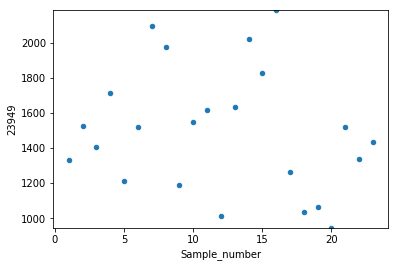

In [65]:
"""
ELF1 
""" 
df = GE_data_[GE_data_.Name==elf1].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name,ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

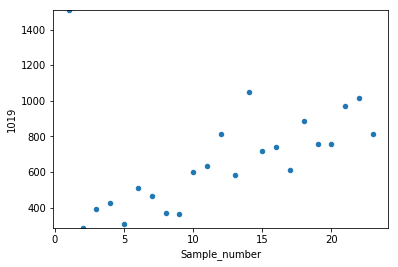

In [66]:
"""
IRF1 
""" 
df = GE_data_[GE_data_.Name==irf1].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name, ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

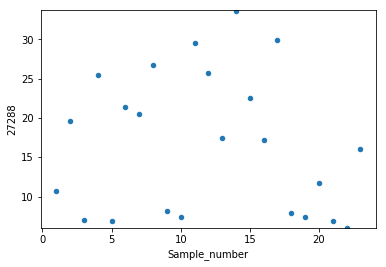

In [67]:
"""
SYNGR1
""" 
df = GE_data_[GE_data_.Name==syngr1].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name, ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

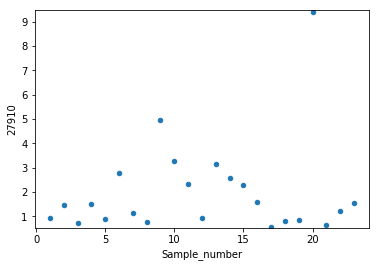

In [68]:
"""
UNC5A
""" 
df = GE_data_[GE_data_.Name==unc5a].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name, ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

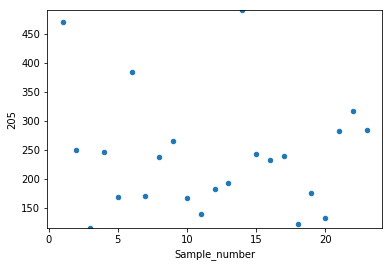

In [69]:
"""
MT1F
""" 
df = GE_data_[GE_data_.Name==mt1f].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name, ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

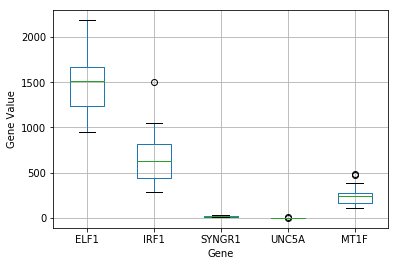

In [70]:
""" 
Box plot 
"""

df = GE_data_[GE_data_.Name.isin(gene_id_list)]
df = df.T.drop(['Name']) 
df = df.astype(float) 
df.boxplot(column=column_name_list).set_xticklabels(['ELF1', 'IRF1', 'SYNGR1','UNC5A','MT1F']) 
plt.xlabel("Gene")
plt.ylabel("Gene Value")

In [71]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x)
GE_data_['CV'] = GE_data_.apply(lambda row : cv(row.T.drop(['Name'])), axis = 1)  
GE_data_['Gene_number'] = range(1, len(GE_data_) + 1) 

(0, 0.1)

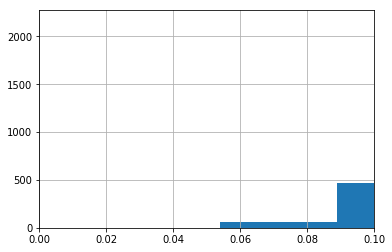

In [72]:
GE_data_['CV'].hist(bins=100).set_xlim(0,0.1)

In [73]:
for gene_ref_id in gene_id_list:
    print(GE_data_[GE_data_['Name']==gene_ref_id]['CV'] )

23949    0.236747
Name: CV, dtype: float64
1019    0.427846
Name: CV, dtype: float64
27910    0.962511
Name: CV, dtype: float64
27288    0.531392
Name: CV, dtype: float64
205    0.420641
Name: CV, dtype: float64


In [74]:
sorted_raw_expre = GE_data_.sort_values(by='CV', ascending=False).reset_index()

In [75]:
for gene_ref_id in gene_id_list:
    print("gene_ref_id",gene_ref_id)
    print(sorted_raw_expre[sorted_raw_expre['Name']==gene_ref_id].index)

gene_ref_id 212420_at
Int64Index([49236], dtype='int64')
gene_ref_id 202531_at
Int64Index([37801], dtype='int64')
gene_ref_id 236448_at
Int64Index([8479], dtype='int64')
gene_ref_id 204287_at
Int64Index([31654], dtype='int64')
gene_ref_id 217165_x_at
Int64Index([38281], dtype='int64')
